In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

*Why isn't there data for Herschel PACS 100 um for these galaxies? Is it due to non-detection or lack of observations?*

In [2]:
path_to_etgs = r'E:\databases\GAMAs4\DETG_DR4.csv'

df_etgs = pd.read_csv(path_to_etgs)

df_non_observed = df_etgs.query('P100_flux < 0')
df_non_detected = df_etgs.query('P100_flux >= 0 & P100_flux < 2*P100_fluxerr')
df_detected = df_etgs.query('P100_flux >= 0 & P100_flux >= 2*P100_fluxerr')

non_observed = len(df_non_observed['SPECID'])
non_detected = len(df_non_detected['SPECID'])
detected = len(df_detected['SPECID'])

print(f'Non-observed PACS 100 : {non_observed}')
print(f'Non-detected PACS 100: {non_detected}')
print(f'Detected PACS 100 : {detected}')

Non-observed PACS 100 : 111
Non-detected PACS 100: 1565
Detected PACS 100 : 733


*Additionally, considering that the initial sample of ~300k galaxies in the GAMA field, is there a particular reason why the selected sample (which was extensively explored through this work) is as low as ~1%?*

In [3]:
path_to_GAMA_DR4 = r'E:\databases\GAMAs4\GAMA_DR4.csv'

GAMA_DR4 = pd.read_csv(path_to_GAMA_DR4)
print('Full GAMA DR4: ', print(GAMA_DR4.shape))

MAGPHYS_GALEX = GAMA_DR4.query('mass_stellar_percentile50 != -99999.0 & GALINDEX_r != -99999.0')
print('Have MAGPHYS & GALEX estimations: ', len(MAGPHYS_GALEX['SPECID']))

REDSHIFT = MAGPHYS_GALEX.query("Z > 0.01 & Z < 0.32")
print('Are in redshift range: ', len(REDSHIFT['SPECID']))

MORPH = REDSHIFT.query("GALINDEX_r > 4") # W/O ERRORS!!!
print('Proper Sersic index: ', len(MORPH['SPECID']))

df_non_observed = MORPH.query('S250_flux < 0 | S250_fluxerr < 0')
df_non_detected = MORPH.query('S250_flux >= 0 & S250_flux <= 3*S250_fluxerr & S250_fluxerr >= 0')
df_detected = MORPH.query('S250_flux >= 0 & S250_flux > 3*S250_fluxerr & S250_fluxerr >= 0')

non_observed = len(df_non_observed['SPECID'])
non_detected = len(df_non_detected['SPECID'])
detected = len(df_detected['SPECID'])

print(f'Non-observed SPIRE 250 : {non_observed}')
print(f'Non-detected SPIRE 250: {non_detected}')
print(f'Detected SPIRE 250 : {detected}')

SDSS_GAMA = df_detected.query('SURVEY == "SDSS" | SURVEY == "GAMA"') 
print('SDSS or GAMA: ', len(SDSS_GAMA['SPECID']))

ETGs = SDSS_GAMA.query('BPT != "NDA" & WHAN != "NDA"') 
print('Finally: ', len(ETGs['SPECID']))

C:\Users\ALEZHA_ACTIVE\AppData\Local\Temp\ipykernel_19084\4244102734.py:3: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  GAMA_DR4 = pd.read_csv(path_to_GAMA_DR4)


(305529, 78)
Full GAMA DR4:  None
Have MAGPHYS & GALEX estimations:  195988
Are in redshift range:  154710
Proper Sersic index:  24931
Non-observed SPIRE 250 : 4649
Non-detected SPIRE 250: 17831
Detected SPIRE 250 : 2451
SDSS or GAMA:  2413
Finally:  2409


*Appendices: Claiming the sample is not biased is a big assumption. Although the authors discuss aperture effects in length, the redshift range of the sample (0.01 to 0.32) is well within the range where the galaxies could be most affected. The work of Agostino et al. 2023 cited to justify the absence of aperture effect on its own could be biased, given that galaxies at z ~ 0.1 are already quite far, thus considerably reducing the possibility of aperture effects affecting the classification. Did the authors explore in depth the range of galaxy sizes for nearby galaxies?*

(184, 83)


c:\Users\ALEZHA_ACTIVE\Anaconda3\Lib\site-packages\astropy\units\quantity.py:671: RuntimeWarning: divide by zero encountered in divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


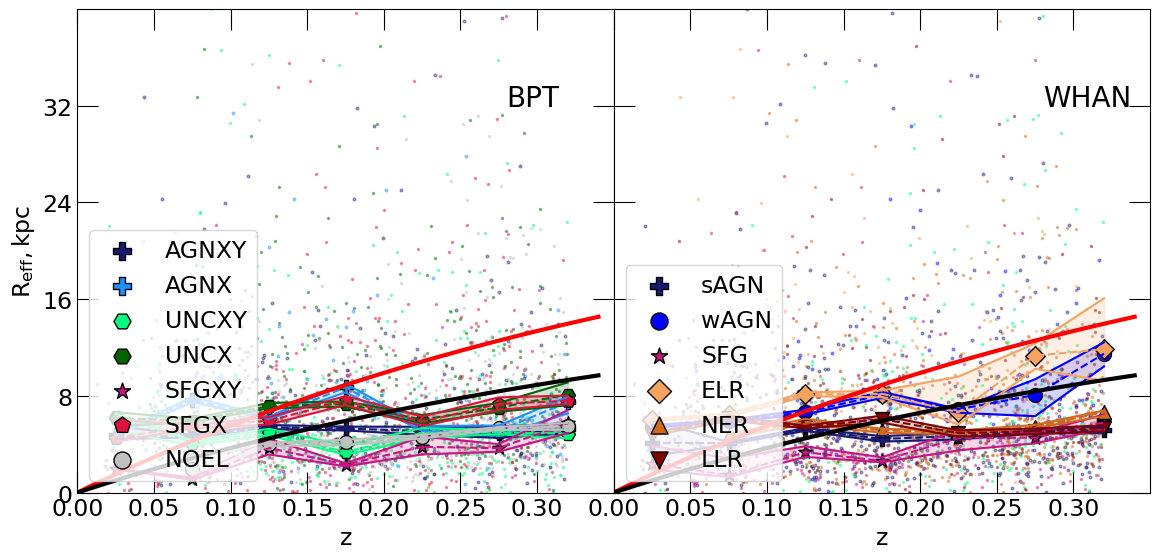

In [10]:
from astropy.cosmology import FlatLambdaCDM
import astropy.units as u
from __plt__2 import *

cosmo = FlatLambdaCDM(H0=70, Om0=0.3)

path_to_etgs = r'E:\databases\GAMAs4\DETG_DR4.csv'

df_etgs = pd.read_csv(path_to_etgs)

gs_top = plt.GridSpec(1, 2, hspace=0, wspace=0)
fig = plt.figure(figsize=(12, 6), tight_layout=True)

adjusting_plotting_pars()

ax1 = fig.add_subplot(gs_top[0])
ax2 = fig.add_subplot(gs_top[1], sharey=ax1)

df_etgs['R_EFF_percentile50'] = df_etgs['GALRE_r'] / cosmo.arcsec_per_kpc_proper(df_etgs['Z'])
df_etgs['R_EFF_percentile84'] = (df_etgs['GALRE_r'] + df_etgs['GALREERR_r']) / cosmo.arcsec_per_kpc_proper(df_etgs['Z'])
df_etgs['R_EFF_percentile16'] = (df_etgs['GALRE_r'] - df_etgs['GALREERR_r']) / cosmo.arcsec_per_kpc_proper(df_etgs['Z'])


pars_dict_1 ={
    'db' : df_etgs,
    'ax1' : ax1,
    'ax2' : ax2,
    'x' : 'Z',
    'y' : 'R_EFF_percentile50',
    'up' : 'R_EFF_percentile84',
    'down' : 'R_EFF_percentile16',
    'xlim' : [0.0, 0.35],
    'ylim' : [0, 40],
    'xticks' : np.arange(0.0, 0.35, 0.05),
    'yticks' : np.arange(0, 40, 8),
    'xlabel' : r'$\mathrm{z}$',
    'ylabel' : r'$\mathrm{R_{eff}, kpc}$',
    'bids': [[0.0, 0.05], [0.05, 0.1], [0.1, 0.15], [0.15, 0.2], [0.2, 0.25], [0.25, 0.3], [0.3, 0.34]],
    'annotation' : True,
    'legend' : True
}

df = df_etgs.query('R_EFF_percentile50 > 50')
print(df.shape)
ax1, ax2 = plotting(pars_dict_1)

for ax in [ax1, ax2]:
    x = np.arange(0, 0.35, 0.01)
    ax.plot(x, 3 / cosmo.arcsec_per_kpc_proper(x), color='red', linestyle='solid', linewidth=3)
    ax.plot(x, 2 / cosmo.arcsec_per_kpc_proper(x), color='black', linestyle='solid', linewidth=3)

fig.savefig(r'E:\backup\backup_BPT\FIGURES_IN_PAPER_DR4\SIZE.pdf', dpi=300, transparent = True, bbox_inches = 'tight', pad_inches = 0.0001)